## PCA 

In [ ]:
# 데이터 읽기


from IPython.display import Image
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

#caltech_dir = "./multi_img_data/imgs_others/train"
caltech_dir = "/content/drive/MyDrive/hairloss_image/boundingbox/agumentation"
categories = ["m0", "m1", "m2",]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = caltech_dir + "/" + cat
    #files = glob.glob(image_dir+"/*.PNG")
    files = glob.glob(image_dir+"/*.jpg") # 확장자 주의
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        #img= img.convert('L')   #흑백변환
        img = img.convert("RGB") #컬러변환
        img = img.resize((image_w, image_h))
        #display(img)

        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/hairloss_image_data.npy", xy)

print("ok", len(y))

m0  파일 길이 :  500
m0  :  /content/drive/MyDrive/hairloss_image/boundingbox/agumentation/m0/0_0_m0_agumentation.jpg
m1  파일 길이 :  500
m1  :  /content/drive/MyDrive/hairloss_image/boundingbox/agumentation/m1/0_0_m1_agumentation.jpg
m2  파일 길이 :  500
m2  :  /content/drive/MyDrive/hairloss_image/boundingbox/agumentation/m2/0_0_m2_agumentation.jpg
ok 1500


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
print(X.shape)
print(X[0].shape)
print(y[0])

(1500, 64, 64, 3)
(64, 64, 3)
[1 0 0]


In [ ]:
# pca 처리
#hair_iamge = np.load('/content/drive/MyDrive/hairloss_image_data.npy', allow_pickle=True)
hair_iamge = X
#print(hair_iamge.shape)
hair_iamge_2d = hair_iamge.reshape(-1, image_w*image_h*3) #  컬러일 경우
#hair_iamge_2d = hair_iamge.reshape(-1, image_w*image_h) #  흑백일 경우

In [ ]:
hair_iamge_2d.shape

(1500, 12288)

In [ ]:
new_y = []
for i in y:
  if i[0] == 1:
    new_y.append(0)
  elif i[1] == 1:
    new_y.append(1)
  else:
    new_y.append(2)
new_y = np.array(new_y)
print(new_y)

[0 0 0 ... 2 2 2]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(hair_iamge_2d)

print(pca.components_.shape)

(50, 12288)


In [ ]:
import matplotlib.pyplot as plt

def draw_hairs(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [ ]:
#draw_hairs(pca.components_.reshape(-1, image_w, image_h))

In [ ]:
#주성분 분석 이전 shape
print(hair_iamge_2d.shape)

#주성분 분석 이후 shape
hairs_pca = pca.transform(hair_iamge_2d)
print(hairs_pca.shape)

(1500, 12288)
(1500, 50)


In [ ]:
hairs_inverse = pca.inverse_transform(hairs_pca)
print(hairs_inverse.shape)
hairs_reconstruct = hairs_inverse.reshape(-1, image_w, image_h)

(1500, 12288)


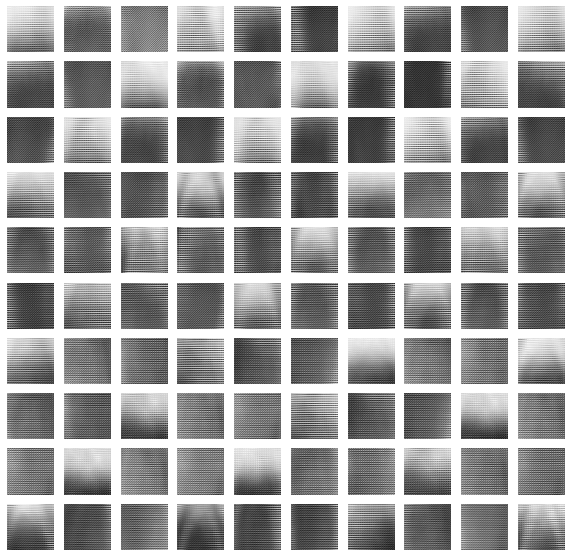

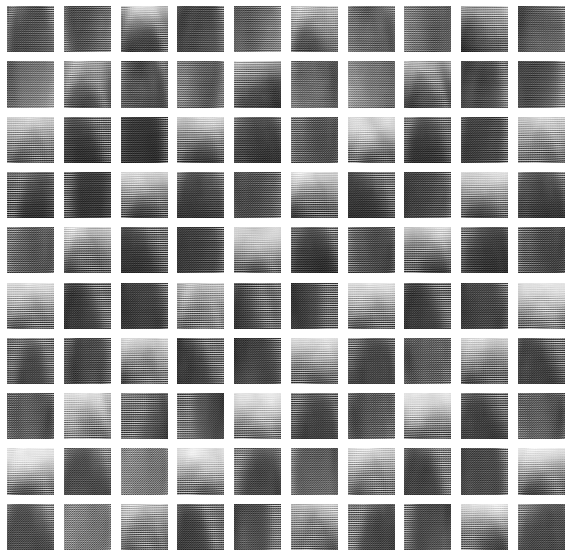

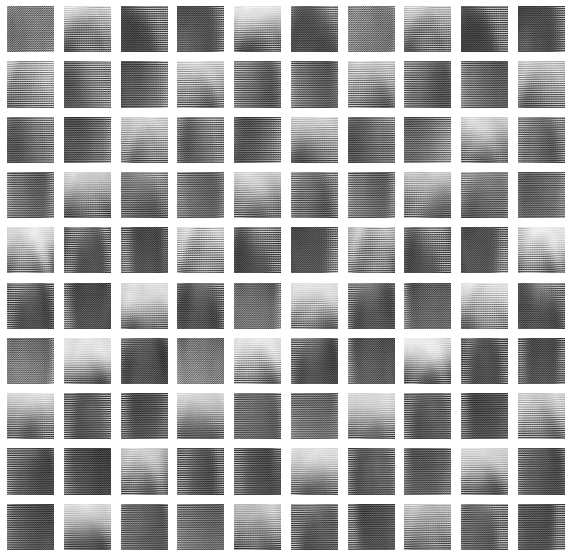

In [ ]:
for start in [0, 100, 200]:
    draw_hairs(hairs_reconstruct[start:start+100])
    print("\n")

0.9497296723302266


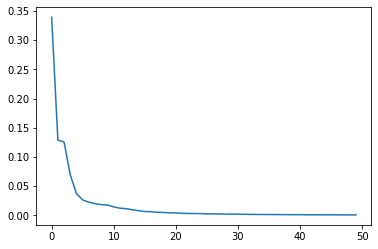

In [ ]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=100)
km.fit(hairs_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([696, 377, 427]))


In [ ]:
# for label in range(0, 3):
#     draw_hairs(hair_iamge[km.labels_ == label])
#     print("\n",label)

In [ ]:
print(km.labels_)

[1 2 1 ... 0 2 0]


In [ ]:
print(hairs_pca[0])

[ 6492.21321574  1387.28125994  2353.40813779  -519.1772788
  -653.85199106  1680.78620935 -1099.63350106  -676.65114027
  -189.48084687  -330.35813347   871.31370517  -628.17920788
  -259.42888886  -935.0049811    636.61563805  -250.38653443
  -234.6795733   -608.71046721  -344.01082941   264.53703617
   205.75054257   244.10347664   -99.31020425    41.34841773
  -181.16585667  -239.20617071  -118.50884105  -215.42467225
    75.70930342   154.75649545  -135.42902775   -76.71534811
  -126.15324158    47.26913644   -34.08848899  -245.55033594
  -166.83564545   -73.29694574  -119.08335054   -26.36719894
   157.34358198  -255.80493238  -163.90418985    58.15308332
    -8.16574043   130.93361772  -135.71021975    17.80362019
   -20.9858213    138.13592819]


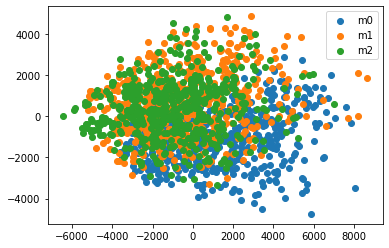

In [ ]:
for label in range(0, 3):
    data = hairs_pca[new_y == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['m0', 'm1', 'm2'])
plt.show()

### tsne

In [ ]:
# from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits

# # MNIST 데이터 불러오기
# data = load_digits()

# # 2차원으로 차원 축소
# n_components = 2

# # t-sne 모델 생성
# model = TSNE(n_components=n_components)

# # 학습한 결과 2차원 공간 값 출력
# result=model.fit_transform(data.data)
# # [
# #     [67.38322, -1.9517338],
# #     [-11.936052, -8.906425],
# #     ...
# #     [-10.278599, 8.832907],
# #     [25.714725, 11.745557],
# # ]

In [ ]:
# print(result.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current fo

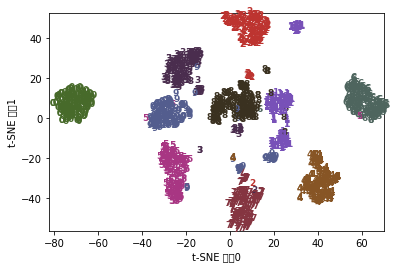

In [ ]:
# from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits

# import matplotlib

# import matplotlib.pyplot as plt


# digits = load_digits()


# # t-SNE 모델 생성 및 학습

# tsne = TSNE(random_state=0)

# digits_tsne = tsne.fit_transform(digits.data)


# colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',

#                '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
# # 시각화

# for i in range(len(digits.data)): # 0부터  digits.data까지 정수

#     plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x, y , 그룹

#              color=colors[digits.target[i]], # 색상

#              fontdict={'weight': 'bold', 'size':9}) # font

# plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대

# plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

# plt.xlabel('t-SNE 특성0') # x축 이름

# plt.ylabel('t-SNE 특성1') # y축 이름

# plt.show() # 그래프 출력

In [ ]:
# print(digits.data.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current fo

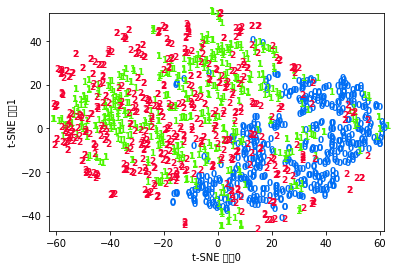

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import matplotlib

import matplotlib.pyplot as plt


#digits = load_digits()


# t-SNE 모델 생성 및 학습

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(hair_iamge_2d)

colors = ['#006ef5', '#4ef500', '#f50031', '#4A2D4E', '#875525',

               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

# 시각화

for i in range(len(hair_iamge_2d)): # 0부터  digits.data까지 정수

    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(new_y[i]), # x, y , 그룹

             color=colors[new_y[i]], # 색상

             fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대

plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 특성0') # x축 이름

plt.ylabel('t-SNE 특성1') # y축 이름

plt.show() # 그래프 출력